# Pilula - Tratando Outliers IIE
### Objetivo da Pílula

* Ler uma base de dadosplanilha IIE
* Identificar outliers
* Remover outliers

In [2]:
# Bibliotecas Gerais
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel(r'D:\Python\Estudos\experimentos\xls\python.xlsx', \
                   sheet_name='Query1')

In [8]:
df=df.loc[(df['Plant']=='RECAP') & (df['Process']=='DST') & (df['Unit']=='U500')] 

In [9]:
df.head()

,Plant,Process,Unit,DataBase,CARGA,IO2,FOMPP,IIE
6679,RECAP,DST,U500,2022-03-08,9300.151200,1.941855,100.0,102.297747
6680,RECAP,DST,U500,2022-03-09,8928.097470,1.799451,100.0,104.277509
6681,RECAP,DST,U500,2022-03-10,9233.421215,1.789455,100.0,101.921716
6682,RECAP,DST,U500,2022-03-11,9300.039044,1.771716,100.0,101.279949
6683,RECAP,DST,U500,2022-03-12,9299.977312,1.980498,100.0,100.677824


In [10]:
dfa=df[['DataBase','IIE','CARGA','IO2','FOMPP']]

C:\Users\cmndl\.conda\envs\learn\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\cmndl\.conda\envs\learn\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


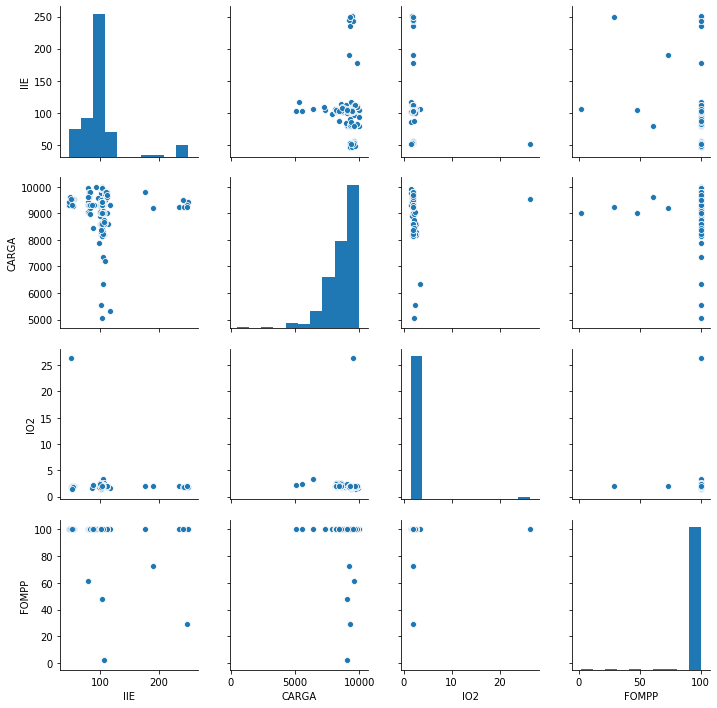

In [12]:
import seaborn as sns
sns.pairplot(dfa)

In [13]:
corr=dfa.corr() # coeficiente de pearson
corr

,IIE,CARGA,IO2,FOMPP
IIE,1.000000,-0.044755,-0.126134,-0.184649
CARGA,-0.044755,1.000000,0.019423,0.005867
IO2,-0.126134,0.019423,1.000000,0.014569
FOMPP,-0.184649,0.005867,0.014569,1.000000


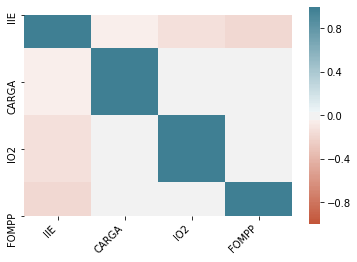

In [14]:
ax=sns.heatmap(
    corr,
    vmin=-1,vmax=1, center =0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [34]:
dfa=dfa.dropna()
dfa_IIE=dfa['IIE'].values # transformar o df em um array numpy
type(dfa_IIE)

numpy.ndarray

In [35]:
%matplotlib inline

Visualizando outliers

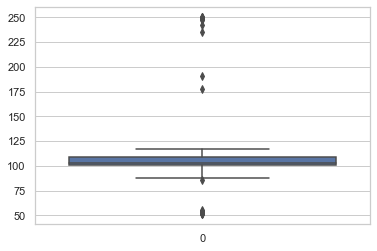

In [36]:
import seaborn as sns
dados =dfa_IIE
sns.set(style='whitegrid', color_codes=True)
sns.boxplot(data=dados)

Verificadno o valor da média

In [37]:
np.mean(dados,axis=0)

109.82076692137913

Verificando o valor do desvio padrao

In [38]:
np.std(dados,axis=0)

48.96848248965189

Definindo fronteiras - Abaixo da média em duas vezes o desvio padrão

In [39]:
mean =np.mean(dados,axis=0)
sd=np.std(dados,axis=0)

In [41]:
li=mean - 2 * sd # limite inferior
li

11.883801942075351

Definindo fronteiras - Acima da média em duas vezes o desvio padrão

In [42]:
ls=mean + 2 * sd # limite superior
ls

207.75773190068293

listando os valores fora das fronteiras

In [43]:
for x in dados:
    if (x < li):
        print(x)

In [44]:
for x in dados:
    if (x > ls):
        print(x)

248.080906822166
235.268568369643
246.848586753065
249.834234337954
250.520973694529
250.355310205987
242.383134486882
248.522138954986


Removendo os valores muito abaixo da média

In [89]:
ndp=2  # aqui colocado 2 desvios padrão para tentar extrair os principais outliers

In [85]:
dados = [x for x in dados if(x>mean - ndp*sd)]

In [86]:
print(dados)

[102.297747178561, 104.277508981985, 101.921716301558, 101.279948869982, 100.677824064089, 100.649502601438, 102.561345104939, 103.455074495241, 105.57813518465, 101.289155004453, 102.724826273731, 103.614648098104, 104.517747657488, 101.867918851528, 101.064025043002, 101.489214032253, 100.794419266775, 109.523585395751, 112.940679330477, 114.418709208154, 112.376103473376, 108.610393566704, 106.729194033128, 104.358315704909, 101.274947555257, 100.891634869586, 101.327767642571, 100.929144369495, 99.2182863768253, 99.6377989707177, 85.9587619317218, 116.596030913036, 111.211467864297, 109.793809032488, 109.136821360507, 109.984936332327, 109.269529300306, 108.766086211036, 111.400724162501, 106.252369615687, 106.713999922495, 105.770837831402, 107.68494198016, 102.388008480582, 105.205612943434, 104.156540759218, 109.639799998822, 106.122607853992, 103.287058473132, 111.504405108477, 104.847713110761, 103.084118970572, 102.660502137666, 112.27862264363, 103.321062669739, 102.54606530

Removendo os valores muito acima da média

In [90]:
dados = [x for x in dados if(x<mean +ndp*sd)]

In [91]:
print(dados)

[102.297747178561, 104.277508981985, 101.921716301558, 101.279948869982, 100.677824064089, 100.649502601438, 102.561345104939, 103.455074495241, 105.57813518465, 101.289155004453, 102.724826273731, 103.614648098104, 104.517747657488, 101.867918851528, 101.064025043002, 101.489214032253, 100.794419266775, 109.523585395751, 112.940679330477, 114.418709208154, 112.376103473376, 108.610393566704, 106.729194033128, 104.358315704909, 101.274947555257, 100.891634869586, 101.327767642571, 100.929144369495, 99.2182863768253, 99.6377989707177, 85.9587619317218, 116.596030913036, 111.211467864297, 109.793809032488, 109.136821360507, 109.984936332327, 109.269529300306, 108.766086211036, 111.400724162501, 106.252369615687, 106.713999922495, 105.770837831402, 107.68494198016, 102.388008480582, 105.205612943434, 104.156540759218, 109.639799998822, 106.122607853992, 103.287058473132, 111.504405108477, 104.847713110761, 103.084118970572, 102.660502137666, 112.27862264363, 103.321062669739, 102.54606530

Plotando novos valores

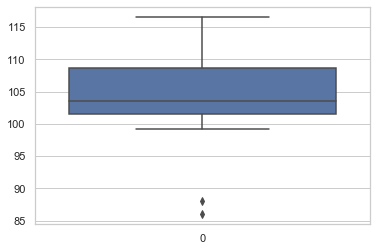

In [92]:
sns.set(style='whitegrid', color_codes=True)
sns.boxplot(data=dados)

## O que aprendemos ?
* baixar arquivos em um dataframe pandas
* analisar o dataframe
* transformar df em array numpy
* avaliar outlier com boxplot
* excluir outliers

## O que faltou ?
* retirado outlier de apenas uma dimensão, mas preciso tirar o mesmo registro das demais séries

## O que devo pesquisar agora ?
* é possível extrair o outlier direto usando o  pandas
* como manter os dados "pareados"
* com este tratamento passar para a regressão linear simples